# since the environmental variable wasn't working within ChaosReservoir, then I'll just do it here, then move the notebook into Chaos, and push it there

In [37]:
import rescomp as rc

In [2]:
import pickle
import os
import pandas as pd
from matplotlib import pyplot as plt

In [54]:
import time

In [47]:
def lorentz_deriv(t0, X, sigma=10., beta=8./3, rho=28.0):
    """Compute the time-derivative of a Lorenz system."""
    (x, y, z) = X
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]
# end

def lorenz_equ(x0=[-20, 10, -.5], begin=0, end=60, timesteps=60000, train_per=.66, clip=0):
    """Use solve_ivp to produce a solution to the lorenz equations"""
    t = np.linspace(begin,end,timesteps)
    clipped_start = floor(timesteps * clip / (end - begin))
    n_train = floor(clipped_start + train_per * (end - clip) / (end - begin) * timesteps)
    train_t = t[clipped_start:n_train]
    test_t = t[n_train:]
    u = integrate.solve_ivp(lorentz_deriv, (begin,end), x0, dense_output=True).sol
    return train_t, test_t, u

# What are the best parameters we've seen that go out to 15 seconds?

In [4]:
p = '/Users/joeywilkes/ReservoirComputing/research_data/'
f = '0compiled_tarball_output_b12_0.pkl'
df = pd.DataFrame(pickle.load(open(p + f,'rb')))

In [5]:
show = ['adj_size','mean_pred','mean_err','remove_p','net','nscc','nwcc','spect_rad','gamma','sigma','ridge_alpha','num_nets_by_exp']
show = ['mean_pred','net','topo_p','adj_size','remove_p','gamma','sigma','ridge_alpha','spect_rad','mean_err']

In [6]:
df.sort_values(by=['mean_pred','mean_err'],ascending=[False,True],inplace=True)
# df[show].sort_values(by=['mean_pred'],ascending=[False],inplace=True)


In [83]:
df.reset_index(inplace=True)

In [84]:
# df.loc[df.net == 'ident'][show]
df[show].head(30)

,mean_pred,net,topo_p,adj_size,remove_p,gamma,sigma,ridge_alpha,spect_rad,mean_err
0,14578.0,no_edges,NaN,500,0.00,25.0,0.40,1.000000e-04,2.0,0.013710
1,13188.0,loop,NaN,2500,0.50,5.0,0.14,1.000000e-02,10.0,0.021291
2,13111.0,watts2,0.5,500,0.98,5.0,0.14,1.000000e-08,2.0,0.016236
3,13032.0,ident,NaN,2500,0.40,50.0,0.14,1.000000e-06,25.0,0.009761
4,12953.0,no_edges,NaN,1500,0.00,10.0,0.14,1.000000e-06,50.0,0.018286
5,12557.0,watts4,0.7,2500,0.98,10.0,0.40,1.000000e-04,25.0,0.015406
6,12515.0,random_digraph,0.5,2500,0.96,5.0,0.14,1.000000e-06,1.0,0.017390
7,11900.0,no_edges,NaN,500,0.00,5.0,0.14,1.000000e-08,5.0,0.018503
8,11885.0,watts4,0.7,2500,0.90,5.0,0.40,1.000000e-04,0.1,0.014466
9,11782.0,loop,NaN,1500,0.80,5.0,0.14,1.000000e-04,0.9,0.017122


In [91]:
df.loc[df.adj_size == 500][show]

,mean_pred,net,topo_p,adj_size,remove_p,gamma,sigma,ridge_alpha,spect_rad,mean_err
0,14578.0,no_edges,NaN,500,0.00,25.0,0.40,1.000000e-04,2.0,0.013710
2,13111.0,watts2,0.5,500,0.98,5.0,0.14,1.000000e-08,2.0,0.016236
7,11900.0,no_edges,NaN,500,0.00,5.0,0.14,1.000000e-08,5.0,0.018503
12,11568.0,erdos,0.5,500,0.99,10.0,0.14,1.000000e-08,1.0,0.016195
17,11364.0,random_digraph,4.0,500,0.99,1.0,0.14,1.000000e-08,25.0,0.019827
21,11194.0,ident,NaN,500,0.30,1.0,0.14,1.000000e-08,10.0,0.023876
24,11123.0,barab1,NaN,500,0.10,5.0,0.14,1.000000e-04,0.9,0.021641
25,11068.0,watts2,0.5,500,0.50,5.0,0.14,1.000000e-06,0.1,0.018460
29,10946.0,watts2,0.7,500,0.80,1.0,0.14,1.000000e-08,0.1,0.018046
30,10912.0,random_digraph,3.0,500,0.99,1.0,0.14,1.000000e-08,0.1,0.021057


# Test 30 reservoir computers with each of these parameters, per size

In [123]:
import time

In [14]:
from ChaosReservoir.HyperParameterOpt.GenerateExperiments.res_experiment import *

In [18]:
TOL = 5

In [43]:
# from rescomp.lorenz_sol import *

In [120]:
z = df.iloc[1]
RIDGE_ALPHA,SPECT_RAD,GAMMA,SIGMA, = z.ridge_alpha, z.spect_rad, z.gamma, z.sigma
DIFF_EQ_PARAMS = {
                  "x0": [-20, 10, -.5],
                  "begin": 0,
                  "end": 85,
                  "timesteps": 85000,
                  "train_per": .889,
                  "solver": lorenz_equ,
                  "clip": 40
                 }

RES_PARAMS = {
              "uniform_weights": True,
              "solver": "ridge",
              "ridge_alpha": RIDGE_ALPHA,
              "signal_dim": 3,
              "network": "random graph",

              "res_sz": 15,
              "activ_f": np.tanh,
              "connect_p": .4,
              "spect_rad": SPECT_RAD,
              "gamma": GAMMA,
              "sigma": SIGMA,
              "sparse_res": True,
             }
adj = generate_adj(z.net, z.topo_p, z.adj_size)
print(z.net, z.topo_p, z.adj_size)

loop nan 2500


In [93]:
print('should we predict out 15 seconds??')

should we predict out 15 seconds??


- this is doing one orbit

In [124]:
start = time.time()
DIFF_EQ_PARAMS["x0"] = random_lorenz_x0()
train_t, test_t, u = rc_solve_ode(DIFF_EQ_PARAMS)
rc = ResComp(adj, **RES_PARAMS)
# Train network
error = rc.fit(train_t, u)
predictions = rc.predict(test_t)
true = u(test_t)
pred = how_long_accurate(true, predictions, tol=TOL)
experiment_time = time.time() - start
print('minutes to run',experiment_time / 60)

minutes to run 3.856949484348297


In [102]:
def hybrid_metric(pred,true):
    diff = pred - true
    return np.linalg.norm(diff,axis=0) / np.linalg.norm(true,axis=0)

def our_mse(pre,u):
    diff = []
    for i in range(u.shape[1]):
        diff.append(np.sum((u[:,i] - pre[:,i])**2)**.5)
    return np.array(diff)
    #mean_error = np.mean(np.linalg.norm(diff, ord=2, axis=0)**2)**(1/2) 

In [140]:
def hybrid_accuracy_duration(hyb_diff):
    """
    Parameters:
        hyb_diff (() ndarray): output of hybrid_metric function
    """
    hybrid_tol = 0.4
    for i in range(len(hyb_diff)):
        dist = hyb_diff[i]
        if dist > hybrid_tol:
            return i
    return len(hyb_diff)

In [110]:
assert hyb_diff.shape == our_diff.shape, 'something is wrong'

In [148]:
pred

113

In [149]:
their_score_timestep_time

177

In [141]:
hyb_diff = hybrid_metric(predictions,true)
our_diff = our_mse(predictions,true)
our_accuracy_duration = pred*0.91 / 1000 #scale is in seconds, not time steps so divide by 1k
their_score_timestep_time = hybrid_accuracy_duration(hyb_diff)
their_score = their_score_timestep_time * 0.91/1000

In [143]:
our_accuracy_duration

0.10283

In [142]:
their_score

0.16107

 should we predict out 20 seconds just to have the limits of the axis the same as in the paper??

In [151]:
end_time = 5
end_time = DIFF_EQ_PARAMS['end'] - 80 # assuming we don't increase the amount of time we train
lyapunov_time = end_time * 0.91
print(lyapunov_time)

4.55


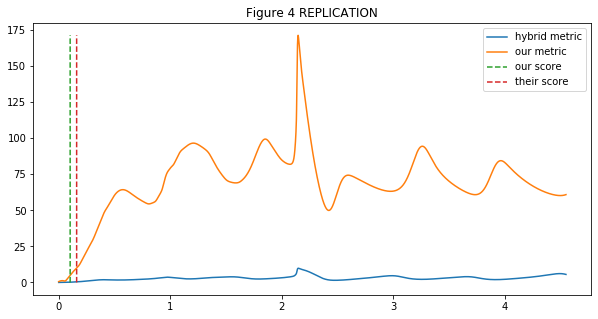

In [152]:
fig = plt.figure(figsize=(10,5))

domain = np.linspace(0,lyapunov_time,len(our_diff))
vertical_line_domain = np.linspace(0,our_diff.max(),len(our_diff))

plt.plot(domain,hyb_diff,label='hybrid metric')
plt.plot(domain,our_diff,label='our metric')
plt.plot(our_accuracy_duration*np.ones_like(domain),vertical_line_domain,'--',label='our score')
plt.plot(their_score*np.ones_like(domain),vertical_line_domain,'--',label='their score')
plt.legend()
plt.title('Figure 4 REPLICATION')
plt.show()